In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from scipy.optimize import leastsq
from scipy import ndimage
from func import *

In [7]:
def emp_fact_spec(z,data,error,wo_wave,min_wave,max_wave):
    k = 1+z
    select1 = (wo_wave>min_wave*k) & (wo_wave<max_wave*k)
    cont_dat = data[select1]
    cont_err = error[select1]
    error_maincube = np.std(cont_dat)
    error_errcube = np.mean(cont_err)
    fact = error_maincube/error_errcube 
    MC_loops = 10000
    parameters_MC = np.zeros(MC_loops)
    for l in range(MC_loops):
        iteration_data = np.random.normal(data,error)
        k = 1+z
        select1 = (wo_wave>min_wave*k) & (wo_wave<max_wave*k)
        cont_dat = iteration_data[select1]
        cont_err = error[select1]
        error_maincube = np.std(cont_dat)
        error_errcube = np.mean(cont_err)
        fact_MC = error_maincube/error_errcube 
        parameters_MC[l]=fact_MC
    plt.hist(parameters_MC,bins=100)
    plt.show()
    print (np.shape(parameters_MC))
    fact_err = np.std(parameters_MC)  
    print (fact,fact_err)
    return fact,fact_err 

In [8]:
def algorithm_script(obj,z,destination_path_cube="/home/mainak/Downloads/Outflow_paper1/MUSE"):
    print ('%s'%(obj))
    (wo_cube,wo_err,wo_wave,wo_header) = loadCube('%s/%s/%s.wo_absorption.fits'%(destination_path_cube,obj,obj)) 
    [x0,y0] = agn_location(obj)
    [brightest_pixel_x,brightest_pixel_y] = [int(x0),int(y0)]
    #print brightest_pixel_x,brightest_pixel_y
    (data,error) = (wo_cube[:,brightest_pixel_y,brightest_pixel_x],wo_err[:,brightest_pixel_y,brightest_pixel_x])
    emp_fact_spec(z,data,error,wo_wave,5030,5050)
    emp_fact_spec(z,data,error,wo_wave,6750,6780)
    emp_fact_spec(z,data,error,wo_wave,5100,5130)

HE1330-1013


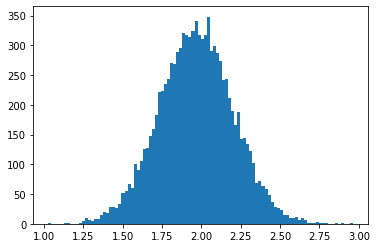

(10000,)
1.7228285 0.2351666726924389


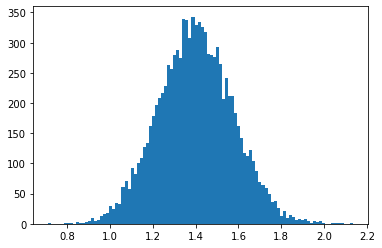

(10000,)
1.0094873 0.17494256373415973


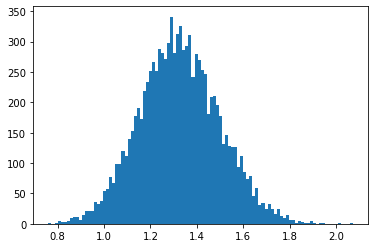

(10000,)
0.9072486 0.1723250257080175


In [9]:
z = {"HE1330-1013":0.022145}

objs = z.keys()

for obj in objs:
     algorithm_script(obj,z[obj]) 


HE0021-1810


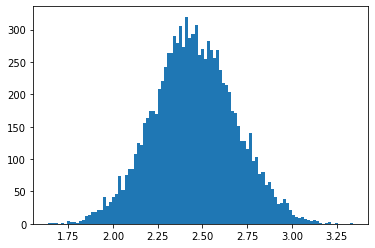

(10000,)
2.2610137 0.23061326819895075


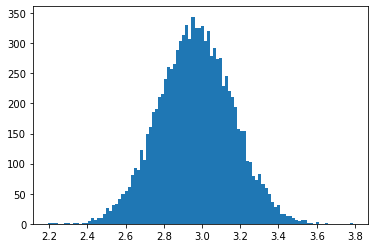

(10000,)
2.8053863 0.19281242802550733


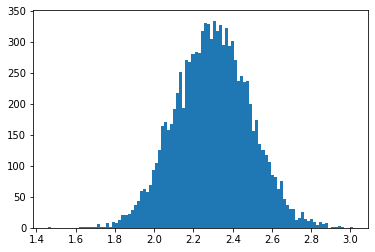

(10000,)
2.0877542 0.189247312733749
HE0021-1819


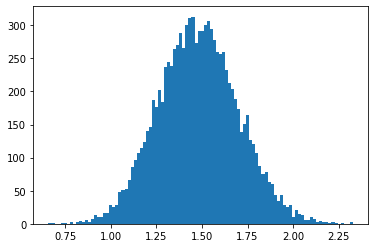

(10000,)
1.1391493 0.21858695409610568


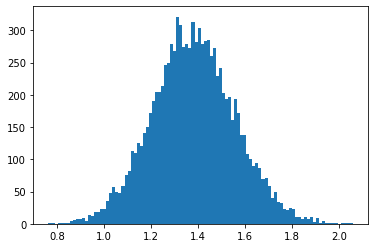

(10000,)
0.9925075 0.17631800906463405


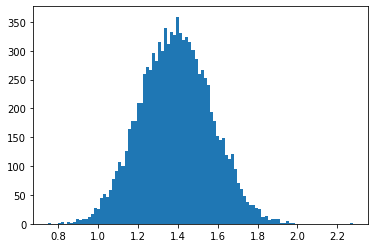

(10000,)
0.9995585 0.1764164484686534
HE0040-1105


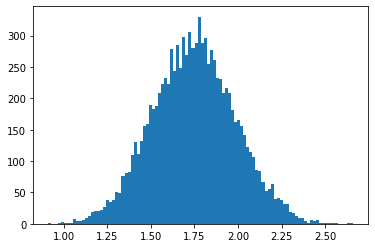

(10000,)
1.4710354 0.23760202202649483


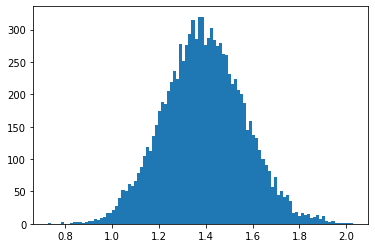

(10000,)
1.0022849 0.17354348269638198


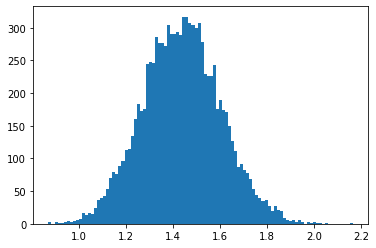

(10000,)
1.0572484 0.16569337472431397
HE0108-4743


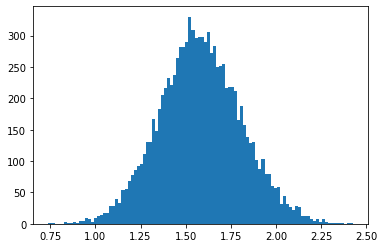

(10000,)
1.2727768 0.22662735119068628


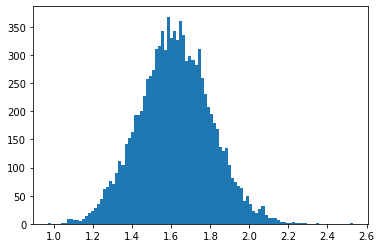

(10000,)
1.3051304 0.18375286056652812


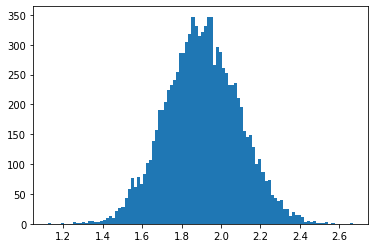

(10000,)
1.6454409 0.18678316766713957
HE0114-0015


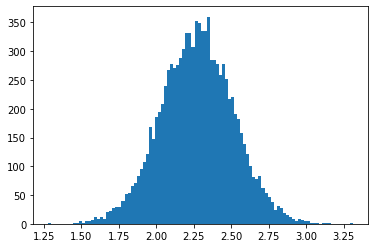

(10000,)
2.0668325 0.24194256143473594


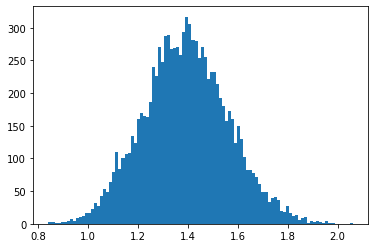

(10000,)
1.0006291 0.16962799521064773


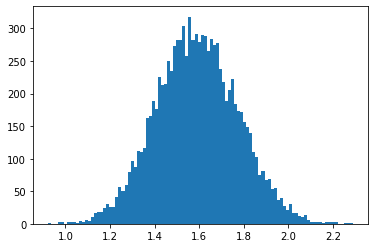

(10000,)
1.2654877 0.1822803465495213
HE0119-0118


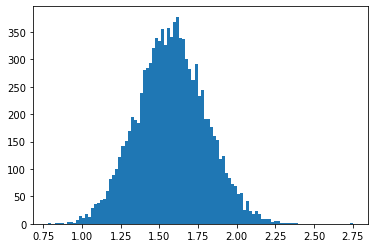

(10000,)
1.267121 0.22279975065503782


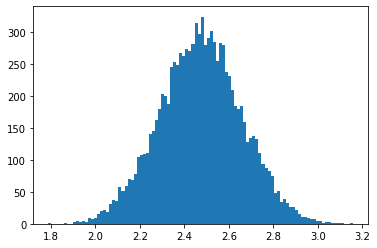

(10000,)
2.276533 0.18446149137098664


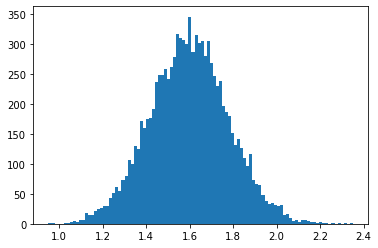

(10000,)
1.2782058 0.18107091472245587
HE0212-0059


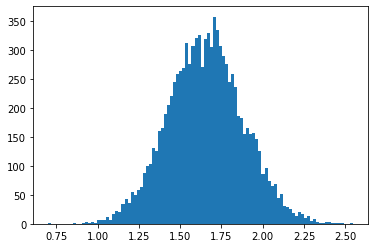

(10000,)
1.3641374 0.2279079658771083


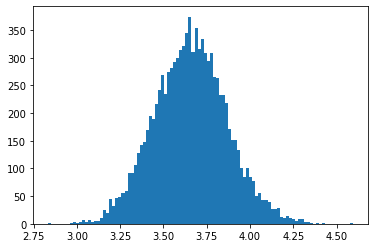

(10000,)
3.5192933 0.2100556393508058


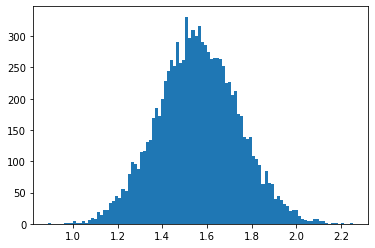

(10000,)
1.229251 0.18010799385289317
HE0224-2834


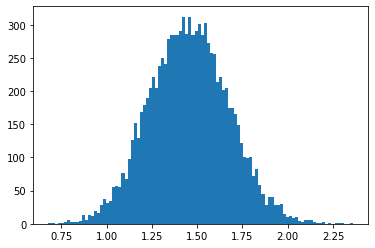

(10000,)
1.1033982 0.21834345376957373


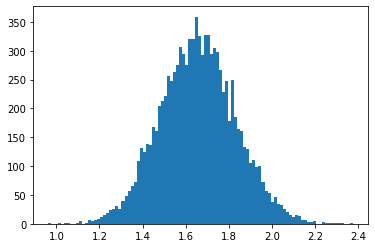

(10000,)
1.3425413 0.17508191389877414


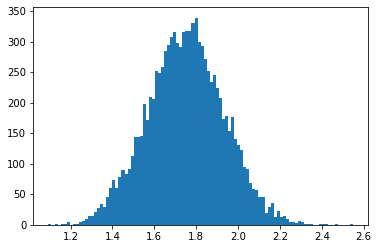

(10000,)
1.4596322 0.1824127932323186
HE0227-0913


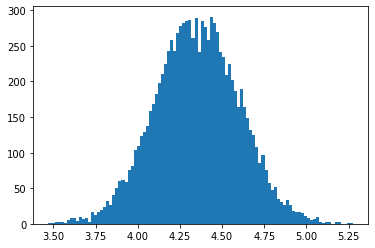

(10000,)
4.2444615 0.24869650074378297


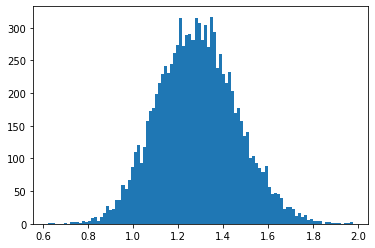

(10000,)
0.8179521 0.1764630298701613


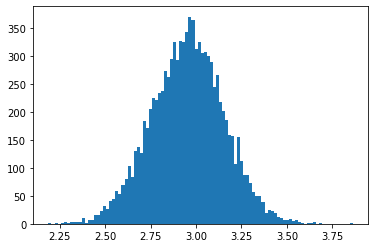

(10000,)
2.7932627 0.19945924473372514
HE0232-0900


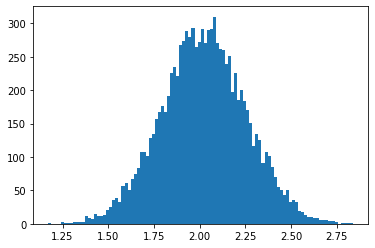

(10000,)
1.7964619 0.23018101612683914


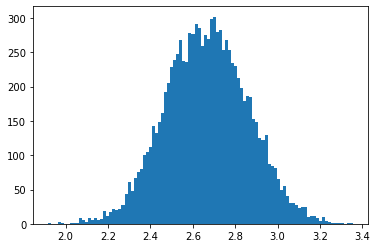

(10000,)
2.4858944 0.19432253477133446


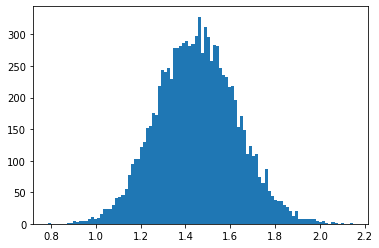

(10000,)
1.081759 0.1775518741565547
HE0253-1641


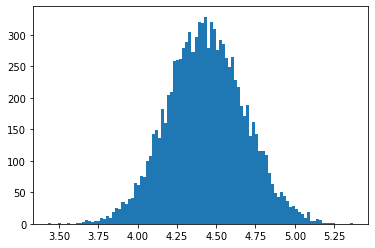

(10000,)
4.3323154 0.24504252023224607


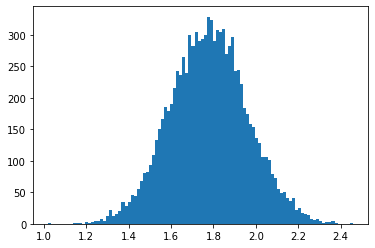

(10000,)
1.4957938 0.18255605727094834


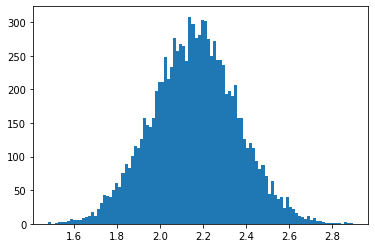

(10000,)
1.9344488 0.19843805856385324
HE0345+0056


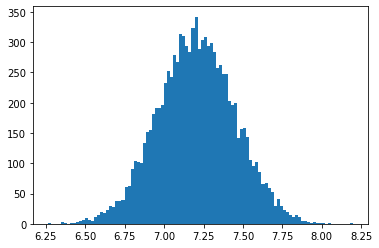

(10000,)
7.1435857 0.24527293014993706


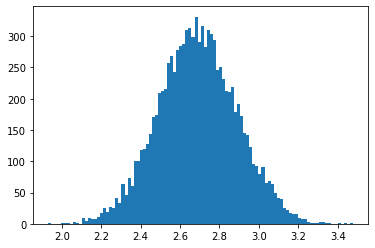

(10000,)
2.512155 0.19920311347104114


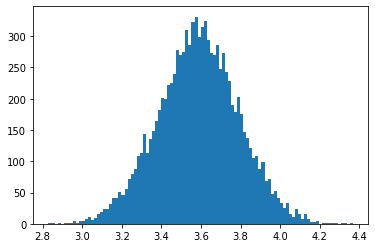

(10000,)
3.4541051 0.20270484674024927
HE0351+0240


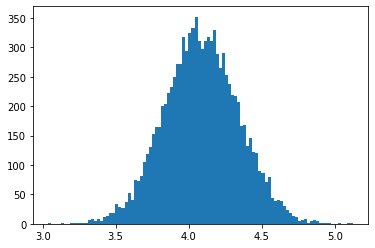

(10000,)
3.9746656 0.25491870175756454


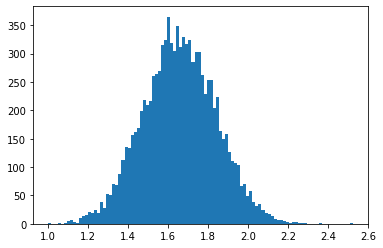

(10000,)
1.3513135 0.1820958194278908


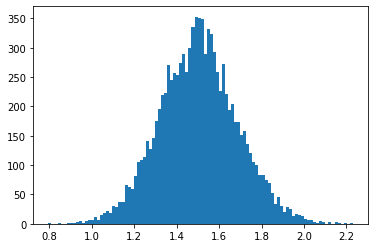

(10000,)
1.155904 0.18311647126446834
HE0412-0803


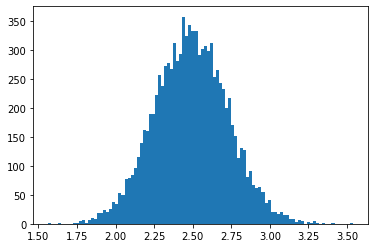

(10000,)
2.3041058 0.23742190544062297


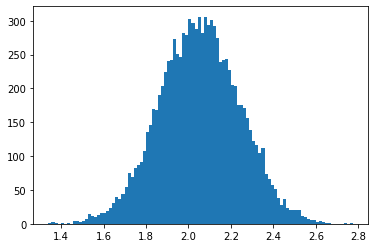

(10000,)
1.8128933 0.18933076747750816


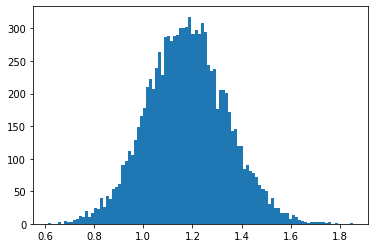

(10000,)
0.6729027 0.16221730965691863
HE0429-0247


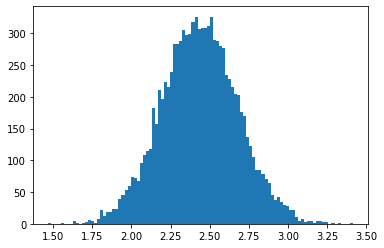

(10000,)
2.2470791 0.24155972142415488


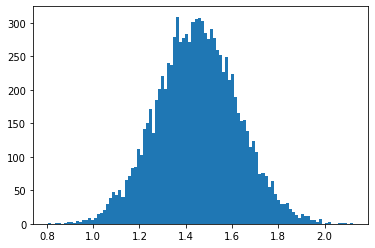

(10000,)
1.0811251 0.17459469502238914


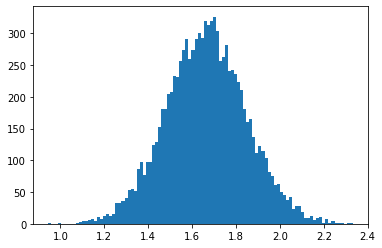

(10000,)
1.3548832 0.18265017053266197
HE0433-1028


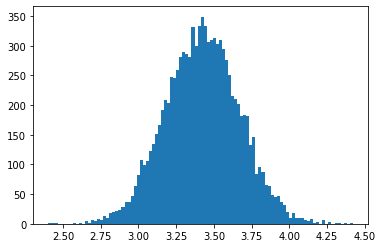

(10000,)
3.2928855 0.24567425617448743


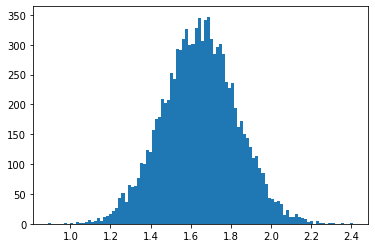

(10000,)
1.3357639 0.18462740233798697


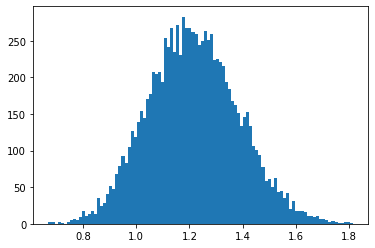

(10000,)
0.73222464 0.16850160225373595
HE0853+0102


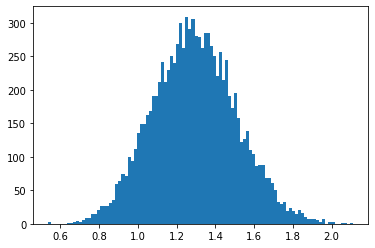

(10000,)
0.8878008 0.21559560272839154


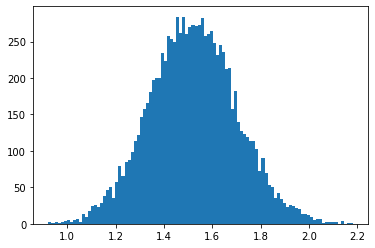

(10000,)
1.1819042 0.17968741148133796


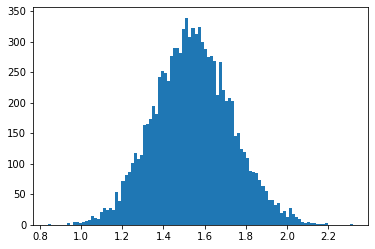

(10000,)
1.2057793 0.18852338204364638
HE0934+0119


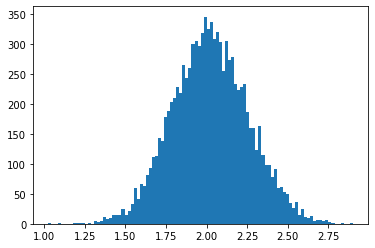

(10000,)
1.7886482 0.23441260137747344


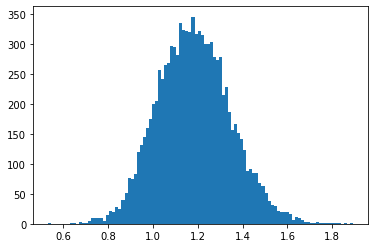

(10000,)
0.67866564 0.16227323969240182


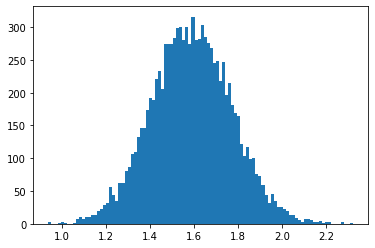

(10000,)
1.2644074 0.18097314041881393
HE1011-0403


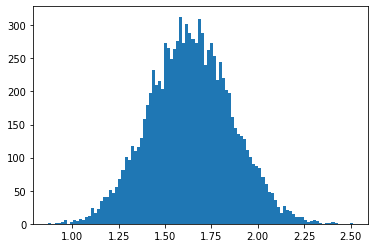

(10000,)
1.3354378 0.22262873302885136


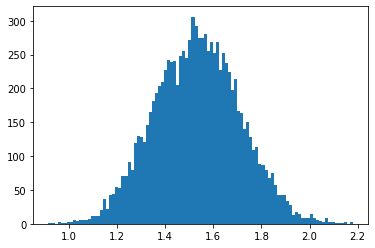

(10000,)
1.1920148 0.17776221545480247


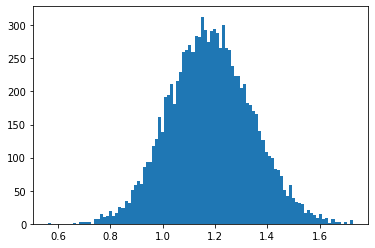

(10000,)
0.6803374 0.15736865143992937
HE1017-0305


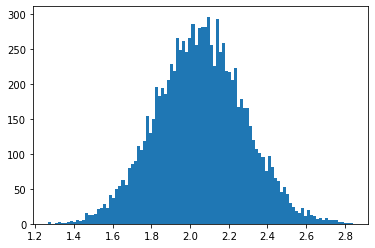

(10000,)
1.8215665 0.2273833157648043


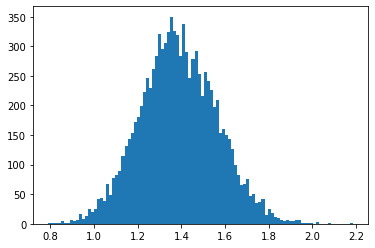

(10000,)
0.9992641 0.17465005954090423


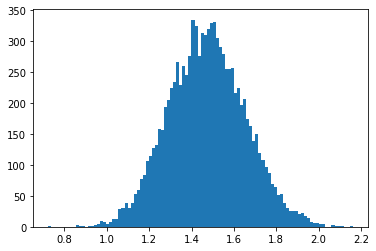

(10000,)
1.1161739 0.1801209360166814
HE1029-1831


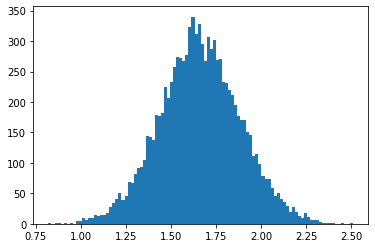

(10000,)
1.365994 0.2234705290199372


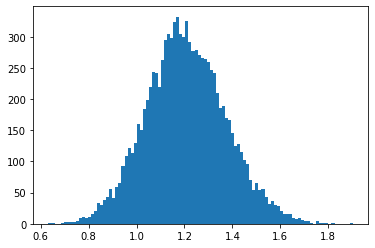

(10000,)
0.7194556 0.165873845205268


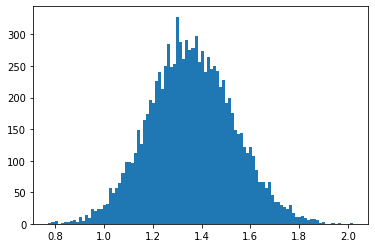

(10000,)
0.95185506 0.17242016116466777
HE1107-0813


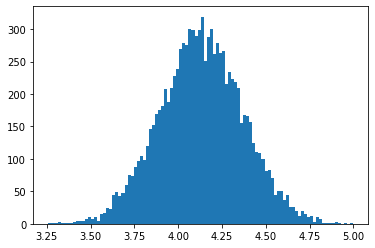

(10000,)
4.0251293 0.23759743217864177


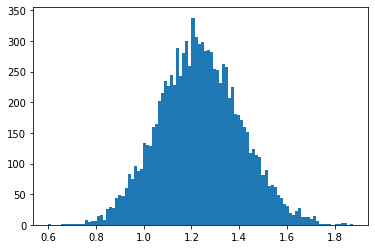

(10000,)
0.7654174 0.1713358836843522


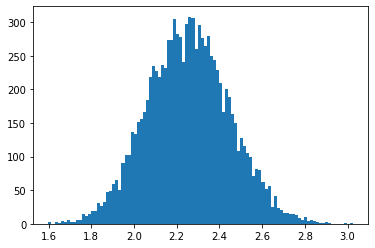

(10000,)
2.036895 0.19324101793399567
HE1108-2813


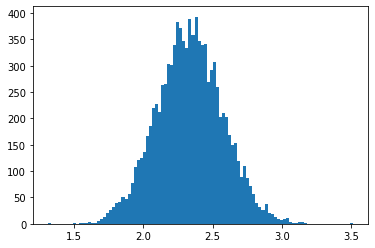

(10000,)
2.1376076 0.23932164272669715


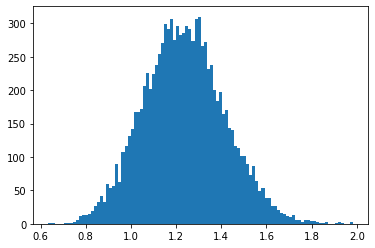

(10000,)
0.7528029 0.17864617128402774


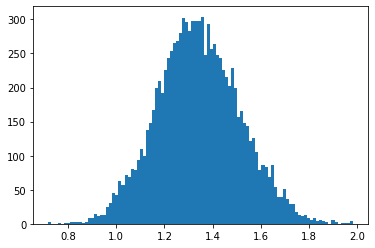

(10000,)
0.9329534 0.17187563429411945
HE1126-0407


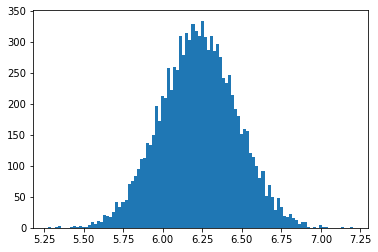

(10000,)
6.157711 0.2414566502450873


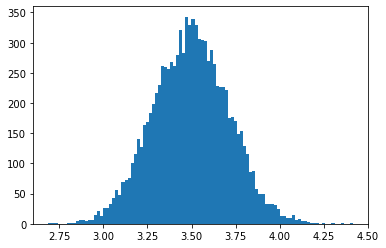

(10000,)
3.3563476 0.21490683312926928


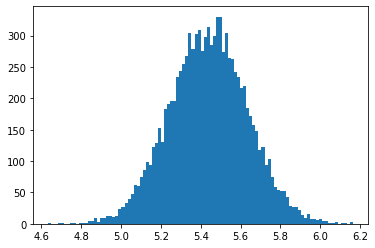

(10000,)
5.351315 0.19562419863644187
HE1237-0504


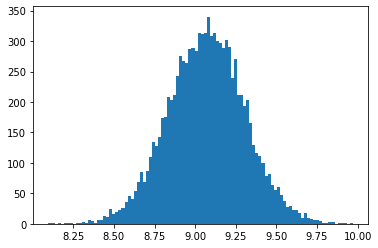

(10000,)
9.022641 0.2357417101581976


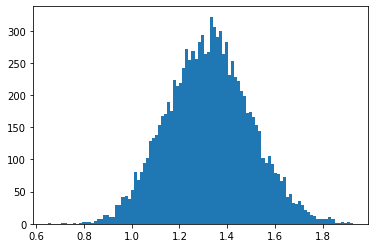

(10000,)
0.90054804 0.17448904723943784


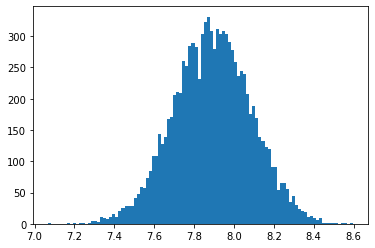

(10000,)
7.8334565 0.19430804576726396
HE1248-1356


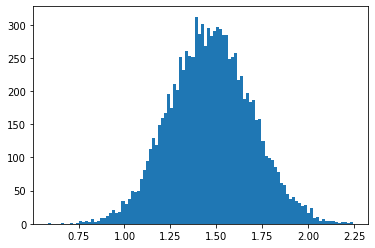

(10000,)
1.1250869 0.2222912037623772


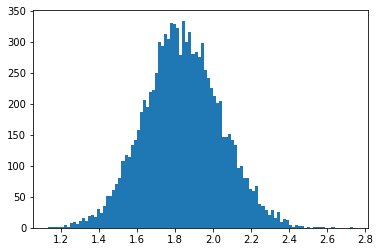

(10000,)
1.5515388 0.20286305187787487


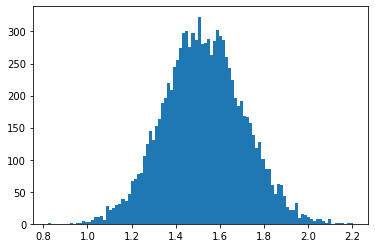

(10000,)
1.1861193 0.18166345374495818
HE1330-1013


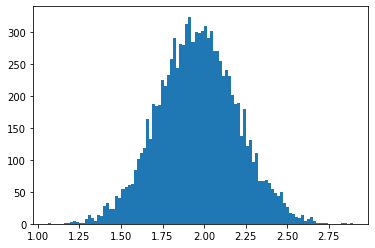

(10000,)
1.7228285 0.2378973230263495


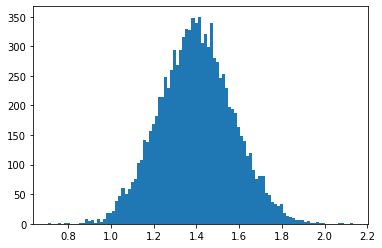

(10000,)
1.0094873 0.17179379473099185


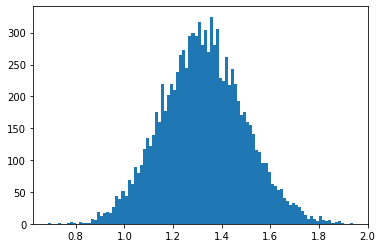

(10000,)
0.9072486 0.17043234867245494
HE1353-1917


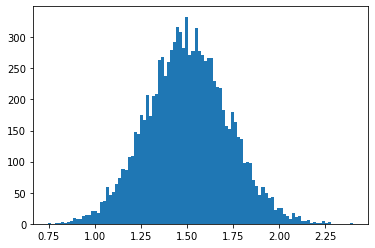

(10000,)
1.1652925 0.22083634362801377


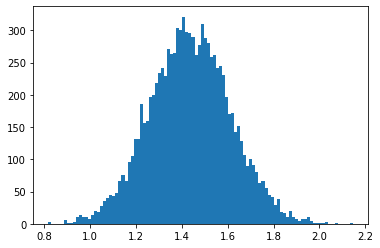

(10000,)
1.0632373 0.17581144672453777


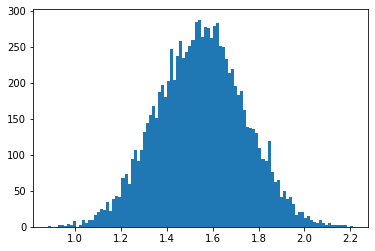

(10000,)
1.214195 0.19011410588724947
HE1417-0909


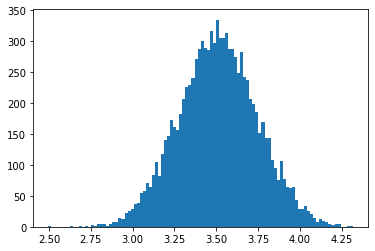

(10000,)
3.378169 0.2351698637170213


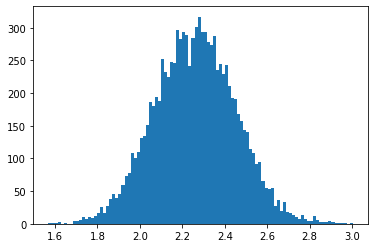

(10000,)
2.0465882 0.19133838060153316


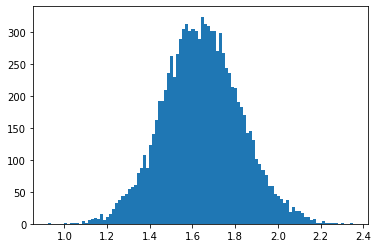

(10000,)
1.3315828 0.18124886006669105
HE2128-0221


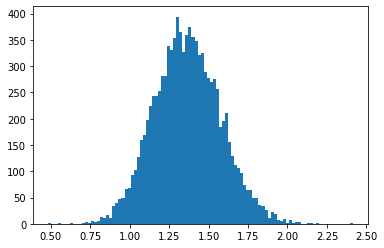

(10000,)
0.983162 0.2104089268095331


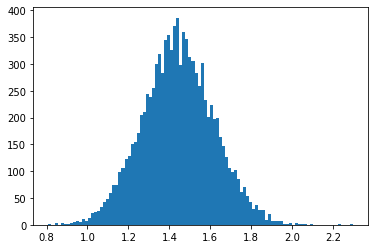

(10000,)
1.0718093 0.17421914438476907


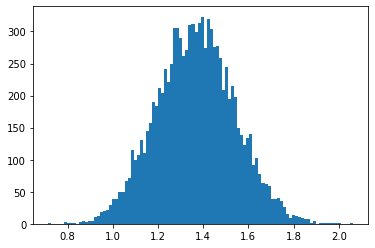

(10000,)
0.96775955 0.17256607823044182
HE2211-3903


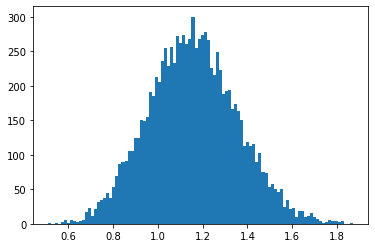

(10000,)
0.6645427 0.1969724460561583


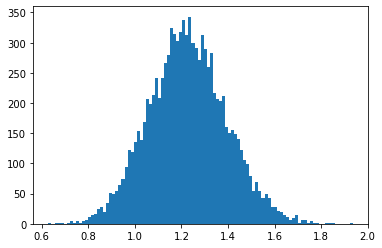

(10000,)
0.75392854 0.16559843900870513


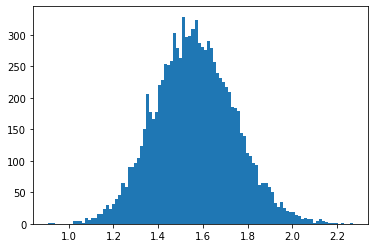

(10000,)
1.2298691 0.1778370670382785
HE2222-0026


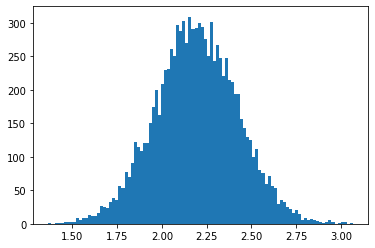

(10000,)
1.9854903 0.22980892282851376


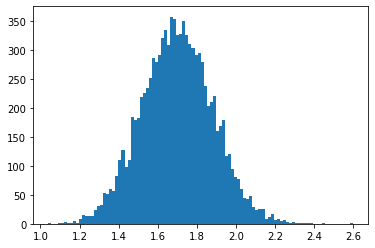

(10000,)
1.399513 0.1820718629380832


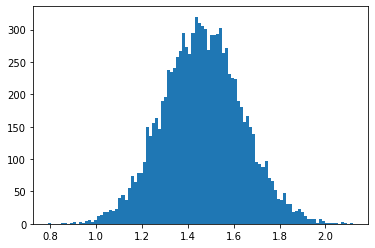

(10000,)
1.0993598 0.17370505467865577
HE2233+0124


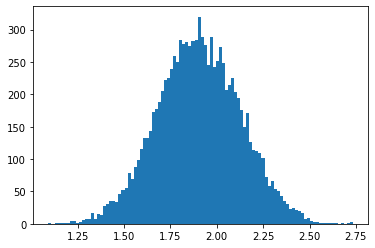

(10000,)
1.6571243 0.22380250941361232


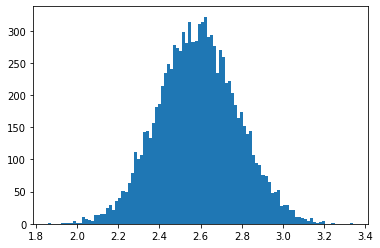

(10000,)
2.403166 0.19260538751908635


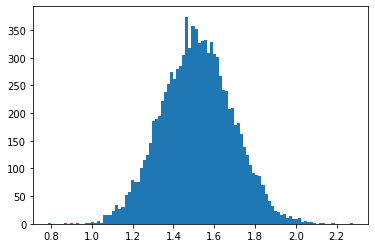

(10000,)
1.1684833 0.17409783919685246
HE2302-0857


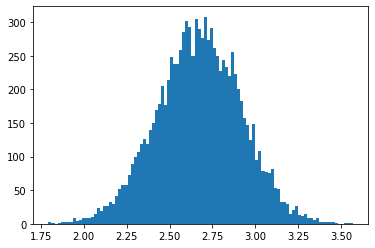

(10000,)
2.501728 0.24444716793078988


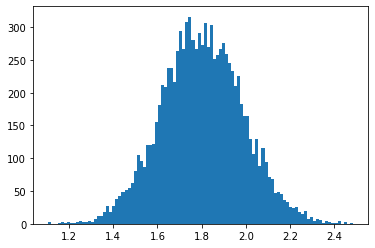

(10000,)
1.5195374 0.18378787079319367


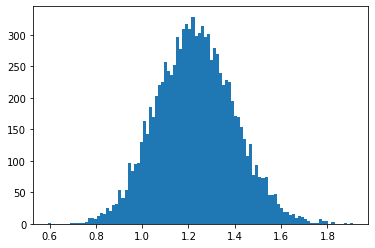

(10000,)
0.76233673 0.1675871366634771


In [11]:
z = {"HE0021-1810":0.05352,"HE0021-1819":0.053197,"HE0040-1105":0.041692,"HE0108-4743":0.02392,"HE0114-0015":0.04560
    ,"HE0119-0118":0.054341,"HE0212-0059":0.026385,"HE0224-2834":0.059800,"HE0227-0913":0.016451,"HE0232-0900":0.043143
    ,"HE0253-1641":0.031588,"HE0345+0056":0.031,"HE0351+0240":0.036,"HE0412-0803":0.038160,"HE0429-0247":0.042009
    ,"HE0433-1028":0.035550,"HE0853+0102":0.052,"HE0934+0119":0.050338,"HE1011-0403":0.058314,"HE1017-0305":0.049986
    ,"HE1029-1831":0.040261,"HE1107-0813":0.058,"HE1108-2813":0.024013,"HE1126-0407":0.061960,"HE1237-0504":0.009
    ,"HE1248-1356":0.01465,"HE1330-1013":0.022145,"HE1353-1917":0.035021,"HE1417-0909":0.044,"HE2128-0221":0.05248
    ,"HE2211-3903":0.039714,"HE2222-0026":0.059114,"HE2233+0124":0.056482,"HE2302-0857":0.046860}

objs = z.keys()

for obj in objs:
     algorithm_script(obj,z[obj]) 


In [2]:
len([1])

1